# SYNTHETIC DATA GENERATION

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
datasets = {}
num_samples = 200
sigma_noise = 0.3

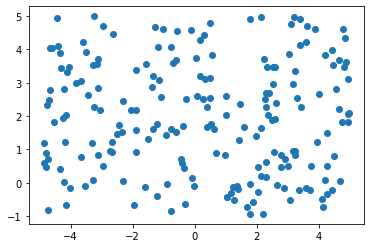

In [137]:
#uncorrelated data
X = np.random.uniform(-5,5,num_samples)
Y = np.random.uniform(-1,5,num_samples)
datasets['uncorr_data'] = (X,Y)
plt.scatter(X,Y)

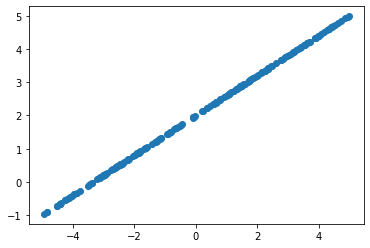

In [138]:
#perfect_correlated data
X = np.random.uniform(-5,5,num_samples)
Y = 0.6*X + 2
datasets['perfect_corr'] = (X,Y)
plt.scatter(X,Y)

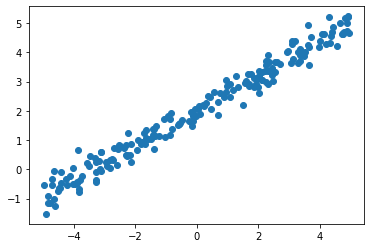

In [139]:
#noisy_correlated data
noise = np.random.normal(0,sigma_noise,num_samples)
X = np.random.uniform(-5,5,num_samples)
Y = 0.6*X + 2 + noise
datasets['noisy_corr'] = (X,Y)
plt.scatter(X,Y)

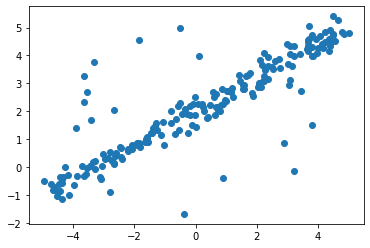

In [140]:
#outlier data
percentage_foreign = 0.1
num_foreign = int(num_samples*percentage_foreign / (1-percentage_foreign))
num_samples = num_samples - num_foreign

noise = np.random.normal(0,sigma_noise,num_samples)
X_wf = np.random.uniform(-5,5,num_samples)
Y_wf = 0.6*X_wf + 2 + noise

X_f = np.random.uniform(-5,5,num_foreign)
Y_f = np.random.uniform(-2,6,num_foreign)

X = np.concatenate([X_wf,X_f],axis=0)
Y = np.concatenate([Y_wf,Y_f],axis=0)
datasets['outlier_uinform'] = (X,Y)
plt.scatter(X,Y)

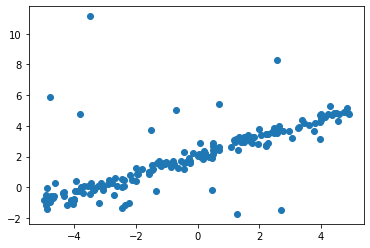

In [141]:
#outlier quad data
percentage_foreign = 0.1
num_foreign = int(num_samples*percentage_foreign / (1-percentage_foreign))
k = np.random.randint(0,num_foreign/2)
num_samples = num_samples - num_foreign - k
noise = np.random.normal(0,sigma_noise,num_samples)
alpha = 0.5
beta = 5

X_wf = np.random.uniform(-5,5,num_samples)
Y_wf = 0.6*X_wf + 2 + noise

X_f = np.random.uniform(-5,5,num_foreign)
Y_f = np.random.uniform(-2,6,num_foreign)

X_k = np.random.uniform(-5,5,k)
Y_k = alpha * X_k * X_k + beta

X = np.concatenate([X_wf,X_f,X_k],axis=0)
Y = np.concatenate([Y_wf,Y_f,Y_k],axis=0)
datasets['outlier_quad'] = (X,Y)
plt.scatter(X,Y)

## MODEL FITTING

In [4]:
def closed_form_solution(data):
    X,Y = data[:,0],data[:,1]
    m = (np.mean(X*Y) - np.mean(X) * np.mean(Y))/(np.mean(X**2) - np.mean(X)**2)
    c = np.mean(Y) - m * np.mean(X)
    return m,c

def plot_best_fit(datasets):
    for case in datasets:
        X,Y = datasets[case]
        data = np.concatenate([X.reshape(X.shape[0],1),Y.reshape(Y.shape[0],1)],axis = 1)
        m,c = closed_form_solution(data)
        
        plt.figure()
        plt.scatter(X,Y)
        x = np.linspace(np.min(X), np.max(X),20)
        y = m * x + c
        plt.plot(x,y,color='r')

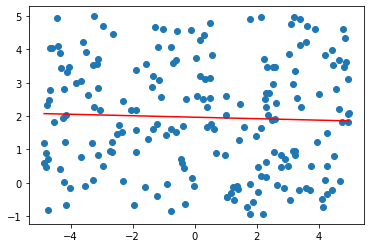

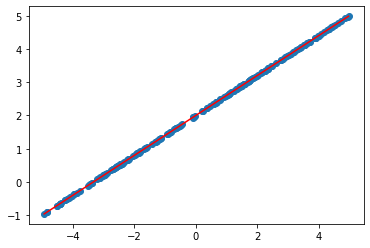

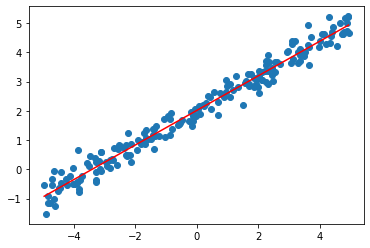

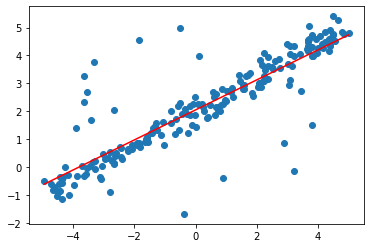

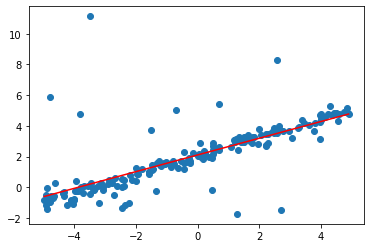

In [143]:
plot_best_fit(datasets)